# Assignment
## Assignment 1: Feature Importance & Multicollinearity
Using the cleaned data under df, you are expected to:

Implement a feature importance method different from the ones already experimented with in this case.
Check for multicollinearity and covariance in the dataset.


Since Random Forest was already used, I apply Recursive Feature Elimination (RFE) with Logistic Regression (since the Titanic dataset involves classification – survival prediction).

In [7]:
import pandas as pd
df=pd.read_csv('cleaned_titanic.csv')

In [16]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define features and target
X = df.drop(columns=["survived"])  # Drop the target variable
y = df["survived"]  # Target variable

# Apply RFE with Logistic Regression
model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)  # You can change the number of features to keep
rfe.fit(X, y)

# Get feature importance (ranking)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Sort by Ranking (ascending order, so importance = 1 is at the top)
feature_importance_sorted = feature_importance.sort_values(by='Ranking')

# Print the sorted feature importance
print(feature_importance_sorted)


        Feature  Ranking
1           sex        1
7         class        1
8           who        1
9    adult_male        1
11        alive        1
0        pclass        2
3         sibsp        3
12        alone        4
4         parch        5
13     fare_log        6
6      embarked        7
14  fare_boxcox        8
10  embark_town        9
2           age       10
5          fare       11


# Summary of Feature Importance:
## Top Features:

Sex, Class, Who, Adult Male, and Alive have been ranked as the most important features, all having a ranking of 1. These features are likely the strongest predictors of survival on the Titanic based on the model.

## Intermediate Features:

Features like Pclass and SibSp rank next with scores of 2 and 3, indicating they have significant importance but are not as impactful as the top features.

## Low Importance Features:

Alone, Parch, Fare_log, Embarked, Fare_boxcox, and Embark_town are ranked lower (from 4 to 9). These features are less critical to predicting survival, though some still contribute valuable information.

## Least Important:

Age and Fare have the lowest rankings (10 and 11), indicating that these features have the least impact on survival prediction compared to others in the dataset.


#### Features related to personal characteristics and class (like Sex, Class, and Who) are crucial in predicting survival, which is intuitive given the historical context of the Titanic disaster.

#### Age and Fare, although important, are less significant than other features, which may suggest that other factors like passenger class and whether they survived are stronger predictors in this dataset.


#### Therefore, we may need to focus on the top-ranked features for further analysis or model training since they hold more predictive power.

The lower-ranked features can be considered for feature elimination or further analysis on how they might be transformed to improve their relevance.

# Check for Multicollinearity (Feature Correlation)
To detect multicollinearity, check the correlation matrix using a heatmap.

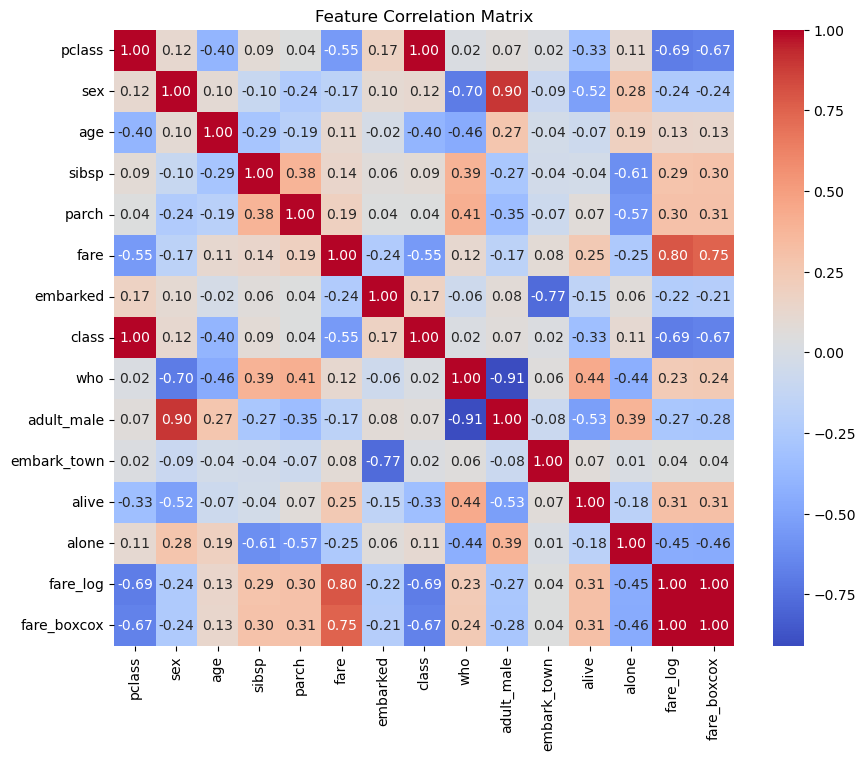

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


# Check for Covariance

In [25]:
# Compute covariance matrix
cov_matrix = X.cov()
print(cov_matrix)


                pclass       sex         age     sibsp     parch         fare  \
pclass        0.731121  0.047741   -4.723985  0.074221  0.028837   -24.494973   
sex           0.047741  0.234353    0.641204 -0.046964 -0.095997    -4.279212   
age          -4.723985  0.641204  193.278503 -3.916984 -2.175958    81.653568   
sibsp         0.074221 -0.046964   -3.916984  0.972652  0.314834     6.952224   
parch         0.028837 -0.095997   -2.175958  0.314834  0.700439     8.379058   
fare        -24.494973 -4.279212   81.653568  6.952224  8.379058  2720.681373   
embarked      0.119919  0.038436   -0.195802  0.049773  0.028654    -9.962620   
class         0.731121  0.047741   -4.723985  0.074221  0.028837   -24.494973   
who           0.011362 -0.229763   -4.298919  0.260501  0.232996     4.077873   
adult_male    0.028258  0.215261    1.873805 -0.133914 -0.143721    -4.262292   
embark_town   0.012121 -0.026786   -0.305548 -0.026523 -0.036421     2.704017   
alive        -0.140089 -0.12

### This covariance matrix represents the relationships between various features in the Titanic dataset. 

## High Covariance:

Pclass and Class: A high positive covariance of 0.731 shows that "Pclass" and "Class" are strongly related.

Fare and Fare_log / Fare_boxcox: The covariance values between Fare, Fare_log, and Fare_boxcox are significant (40.06 and 26.74), indicating a strong relationship between the raw and transformed fare features.

Age and Age-transformed Features: There is a significant covariance between Age and its log-transformed or boxcox-transformed versions (like fare_log and fare_boxcox), showing that these transformations preserve the relationship with Age.

## Negative Covariance:

Fare and Embarked: The negative covariance between Fare and Embarked (-9.96) suggests that passengers who embarked from different locations had a lower fare.

Fare and Pclass: A strong negative covariance of -24.49 indicates that the lower passenger classes (Pclass) generally paid lower fares.

## Mild Correlations:

Age and Sex: A positive covariance of 0.641 indicates that older individuals tend to be male (as age increases in certain groups, the male count also increases).

SibSp and Parch: The covariance between SibSp and Parch is low but positive (0.314), meaning that siblings and parents often traveled together.

## Minimal Relationships:

Embarked and Other Features: Most of the covariances involving Embarked, Embark_town, and Who are close to zero, indicating little to no relationship with the other features.

Alive and Sex, Age, Fare: There is a mild correlation of 0.242 between being alive and various features like Age, showing a weak connection between survival and these variables.

### Transformations and Variations:

Fare_log and Fare_boxcox have high covariance with Fare and relatively lower covariance with other features like Pclass or Embarked, which may be attributed to their transformations that make the fare values more normally distributed.

#### As a summery:
Pclass and Class are strongly correlated, which is expected since they represent the same classification of passengers.

Fare and its transformations are strongly related, indicating that these transformations are capturing the underlying structure of fare data.

Age is positively correlated with several features, including Sex, suggesting that older passengers tended to be male in the Titanic dataset.

There is little relationship between features like Embarked and other variables, suggesting that the location of embarkation might not strongly correlate with other passenger characteristics in this dataset.

The transformations on fare (like fare_log and fare_boxcox) are designed to normalize data, explaining their high covariance with the original fare variable.

## Assignment 2: Data Distributions & Visualization
Work with at least five different types of data distributions.
Visualize them using synthetic data.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
#Generate Synthetic Data for Different Distributions
#(Normal Distribution (Gaussian),Uniform Distribution, Exponential Distribution,Binomial Distribution,Poisson Distribution)
# Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Uniform Distribution
uniform_data = np.random.uniform(low=0, high=10, size=1000)

# Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=1000)

# Binomial Distribution
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)

# Poisson Distribution
poisson_data = np.random.poisson(lam=5, size=1000)


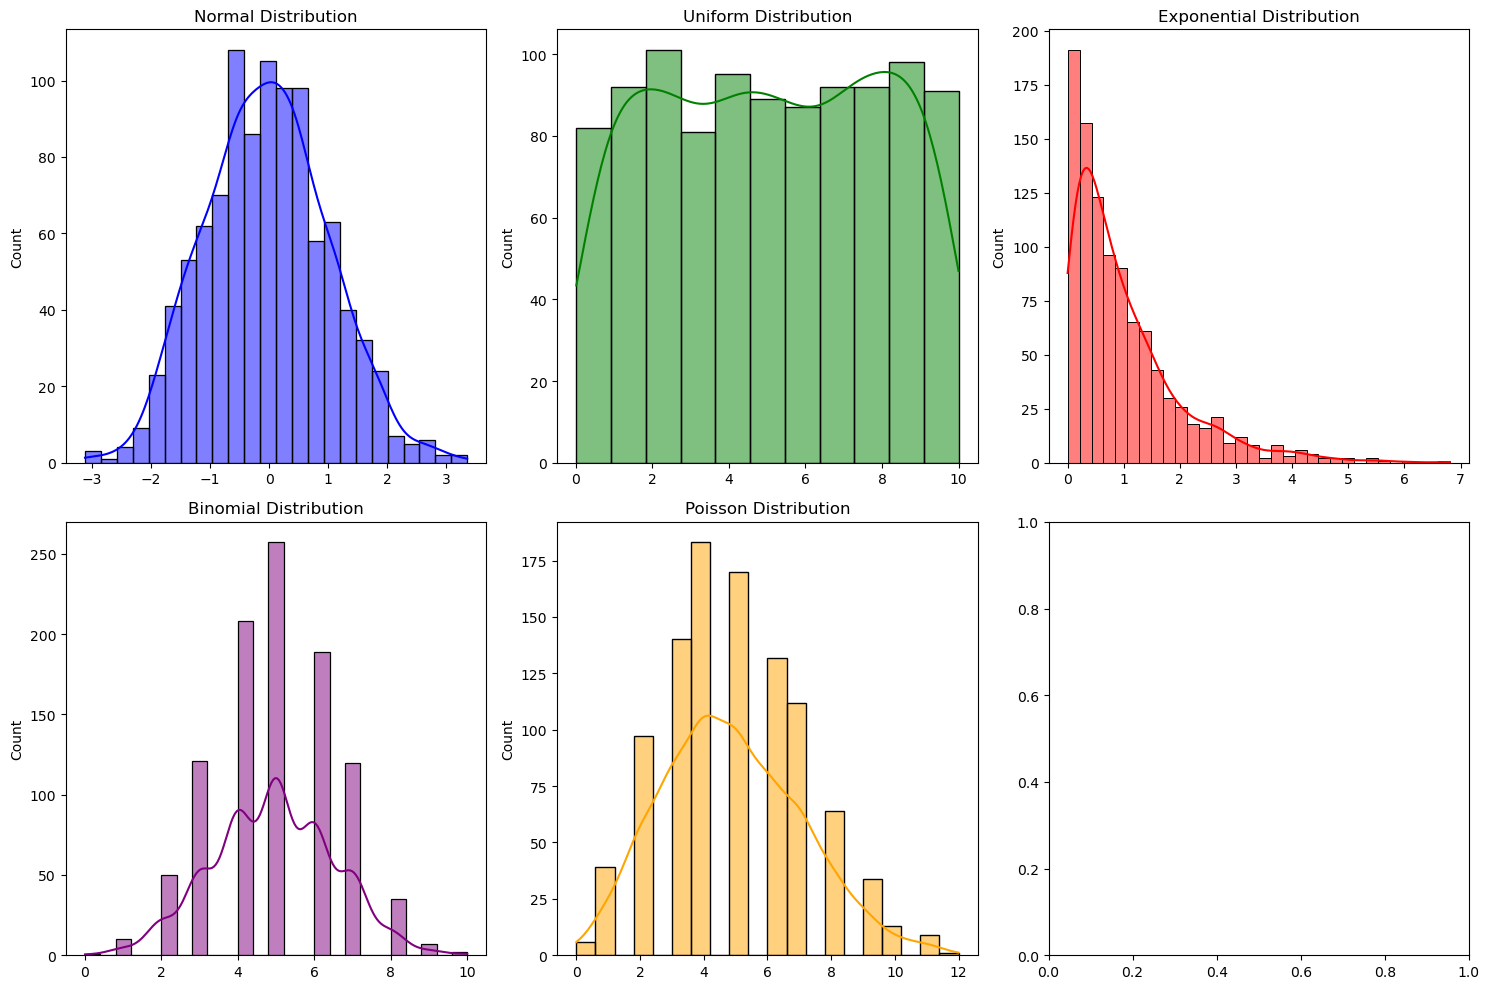

In [28]:
#Plot the Distributions

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Normal Distribution
sns.histplot(normal_data, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Normal Distribution')

# Plot Uniform Distribution
sns.histplot(uniform_data, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Uniform Distribution')

# Plot Exponential Distribution
sns.histplot(exponential_data, kde=True, color='red', ax=axes[0, 2])
axes[0, 2].set_title('Exponential Distribution')

# Plot Binomial Distribution
sns.histplot(binomial_data, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Binomial Distribution')

# Plot Poisson Distribution
sns.histplot(poisson_data, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Poisson Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Each plot shows the distribution of the generated synthetic data:

Normal Distribution: Appears as a bell curve centered around 0, symmetric with most values clustering near the mean.

Uniform Distribution: Appears as a flat distribution, showing an equal frequency of all values between 0 and 10.

Exponential Distribution: have a right-skewed distribution with a heavy concentration of values near 0 and gradually tapering off.

Binomial Distribution: shows a discrete distribution with values clustering around the mean number of successes.

Poisson Distribution: show a discrete distribution with values tending to cluster around a mean of 5, but with some random variation.